In [5]:
from julia.api import Julia
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

os.environ["JULIA_NUM_THREADS"] = "4"
jl = Julia(compiled_modules=False)

In [6]:
print(jl.eval('Threads.nthreads()'))
# import covergence statistic functions
jl.eval('include("convergence_statistics.jl")')

4


<PyCall.jlwrap find_e>

### **1a. Error when varying A dimention** ###

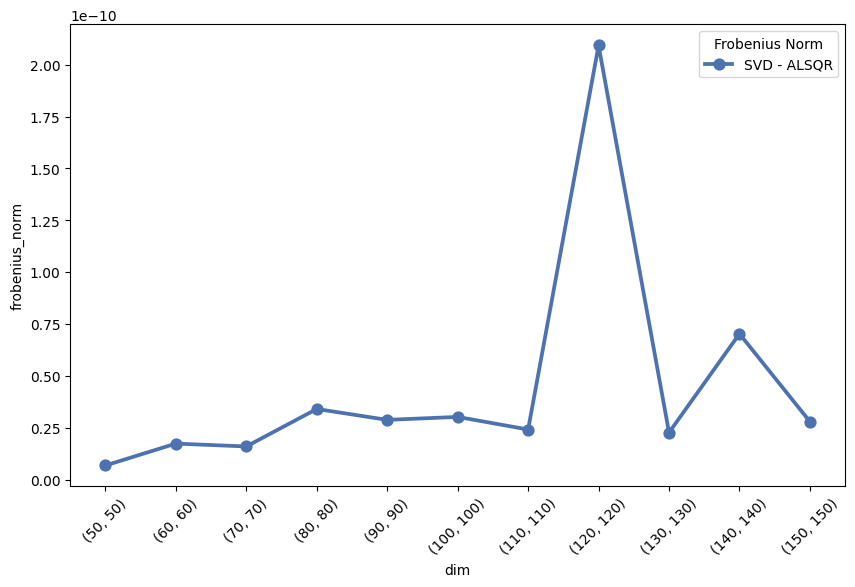

In [3]:
LSQR_SVD = jl.eval('gap_A_var()')

# Convert to DataFrames
df = pd.DataFrame(LSQR_SVD)

# Add a 'method' column to distinguish the data sources
df['Frobenius Norm'] = 'SVD - ALSQR'

# Concatenate the dataframes
df = pd.concat([df])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim',y='frobenius_norm', hue='Frobenius Norm', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Error varying A dimensions")
plt.show()



### **1b. Error when varyng A dimentions with poorly Hilbert conditioned matrices** ###

In [4]:
# LSQR_SVD = jl.eval('gap_A_var_Hilbert_poorly_conditioned()')

# # Convert to DataFrames
# df = pd.DataFrame(LSQR_SVD)

# # Add a 'method' column to distinguish the data sources
# df['Frobenius Norm'] = 'SVD - ALSQR'

# # Concatenate the dataframes
# df = pd.concat([df])

# # Convert 'dim' to string so it can be used as a categorical variable
# df['dim'] = df['dim'].astype(str)

# # Create the plot
# plt.figure(figsize=(10, 6))
# sns.pointplot(data=df, x='dim',y='frobenius_norm', hue='Frobenius Norm', palette='deep')
# plt.xticks(rotation=45)
# plt.show()

### **1c. Error when varyng A dimentions with poorly Vandermonde conditioned matrices** ###

In [5]:
# LSQR_SVD = jl.eval('gap_A_var_Vandermonde_poorly_conditioned()')

# # Convert to DataFrames
# df = pd.DataFrame(LSQR_SVD)

# # Add a 'method' column to distinguish the data sources
# df['Frobenius Norm'] = 'SVD - ALSQR'

# # Concatenate the dataframes
# df = pd.concat([df])

# # Convert 'dim' to string so it can be used as a categorical variable
# df['dim'] = df['dim'].astype(str)

# # Create the plot
# plt.figure(figsize=(10, 6))
# sns.pointplot(data=df, x='dim',y='frobenius_norm', hue='Frobenius Norm', palette='deep')
# plt.xticks(rotation=45)
# plt.show()

### **1bonus. Error when varying A dimentions, square matrix only** ###

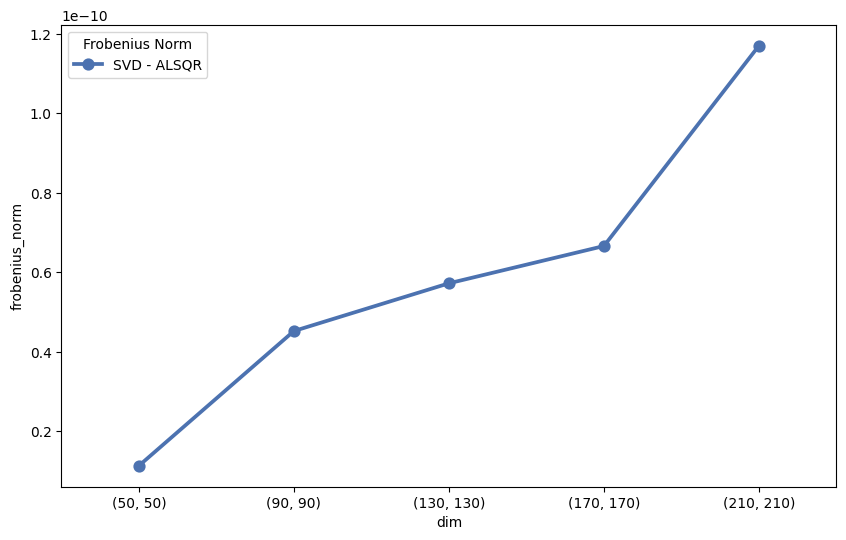

In [6]:
LSQR_SVD = jl.eval('gap_A_var_square()')

# Convert to DataFrames
df = pd.DataFrame(LSQR_SVD)

# Add a 'method' column to distinguish the data sources
df['Frobenius Norm'] = 'SVD - ALSQR'

# Concatenate the dataframes
df = pd.concat([df])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim',y='frobenius_norm', hue='Frobenius Norm', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Error varying A dimentions, square matrices")
plt.show()

### **1bonus. Error when varyng A dimentions, thin matrix only** ###

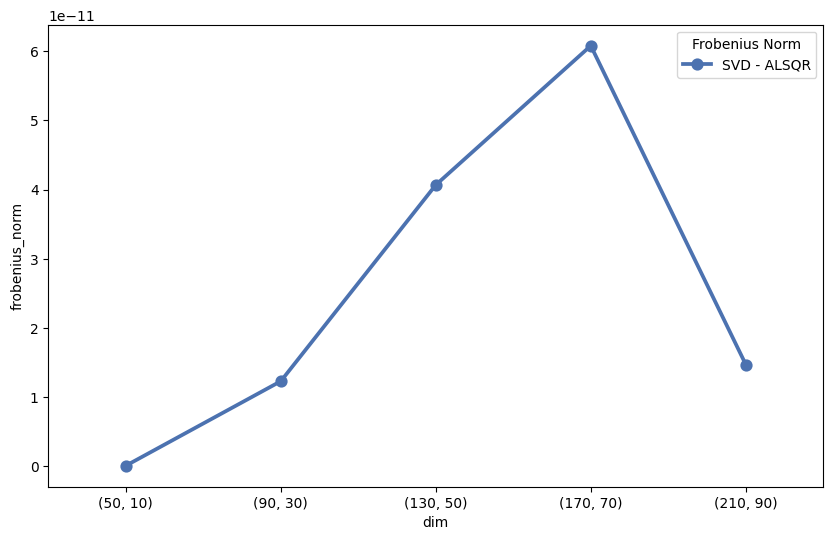

In [7]:
LSQR_SVD = jl.eval('gap_A_var_thin()')

# Convert to DataFrames
df = pd.DataFrame(LSQR_SVD)

# Add a 'method' column to distinguish the data sources
df['Frobenius Norm'] = 'SVD - ALSQR'

# Concatenate the dataframes
df = pd.concat([df])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)



# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim',y='frobenius_norm', hue='Frobenius Norm', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Error varying A dimentions, thin matrices")
plt.show()

### **1bonus. Error when varyng A dimentions, fat matrix only** ###

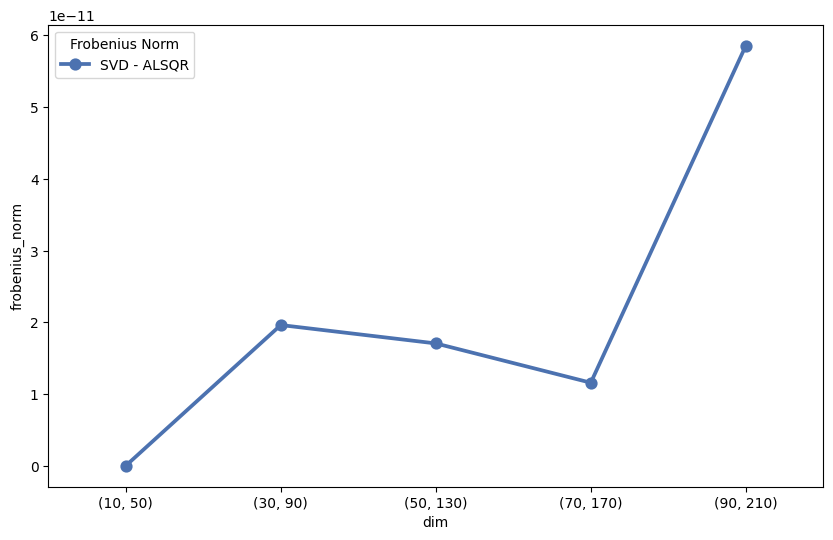

In [8]:
LSQR_SVD = jl.eval('gap_A_var_fat()')

# Convert to DataFrames
df = pd.DataFrame(LSQR_SVD)

# Add a 'method' column to distinguish the data sources
df['Frobenius Norm'] = 'SVD - ALSQR'

# Concatenate the dataframes
df = pd.concat([df])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)



# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim',y='frobenius_norm', hue='Frobenius Norm', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Error varying A dimentions, fat matrices")
plt.show()

### **1bonus. Error when varying A dimentions, dense and sparse matrices** ###

Fatte tutte quelle di dimensione 50*50
Fatte tutte quelle di dimensione 70*70
Fatte tutte quelle di dimensione 90*90
Fatte tutte quelle di dimensione 110*110
Fatte tutte quelle di dimensione 130*130
Fatte tutte quelle di dimensione 150*150
Fatte tutte quelle di dimensione 170*170
Fatte tutte quelle di dimensione 190*190
Fatte tutte quelle di dimensione 210*210
Fatte tutte quelle di dimensione 230*230


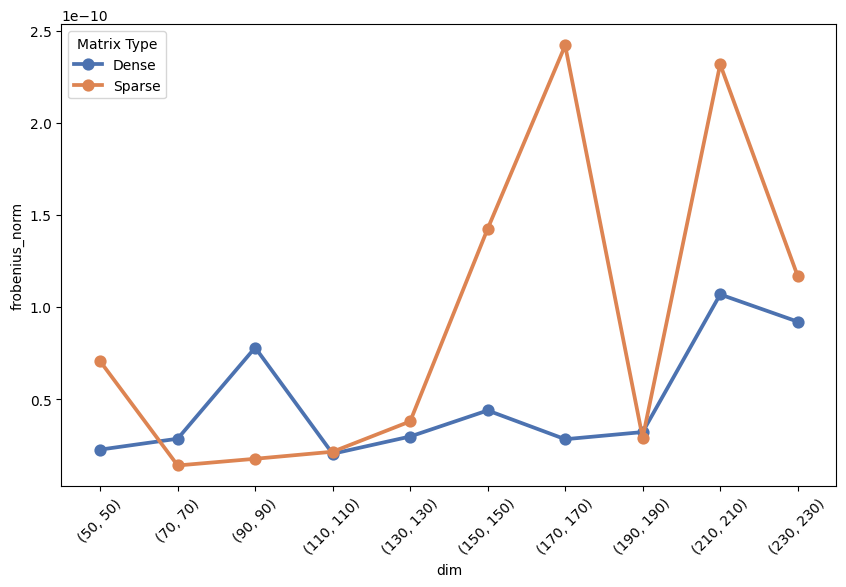

In [9]:
Dense, Sparse = jl.eval('gap_A_var_dense_sparse()')

# Convert Svd_A, LSQR_A, LSQR_SVD to DataFrames
df1 = pd.DataFrame(Dense)
df2 = pd.DataFrame(Sparse)

# Add a 'method' column to distinguish the data sources
df1['Matrix Type'] = 'Dense'
df2['Matrix Type'] = 'Sparse'


# Concatenate the dataframes
df = pd.concat([df1, df2])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='frobenius_norm', hue='Matrix Type', palette='deep')
# plt.xticks(rotation=45)
#plt.title("Error varying A dimentions, dense and sparse matrices")
plt.show()

### **1bonus. Error when varying A dimentions, orthogonal, diagonal and lower triangular** ###

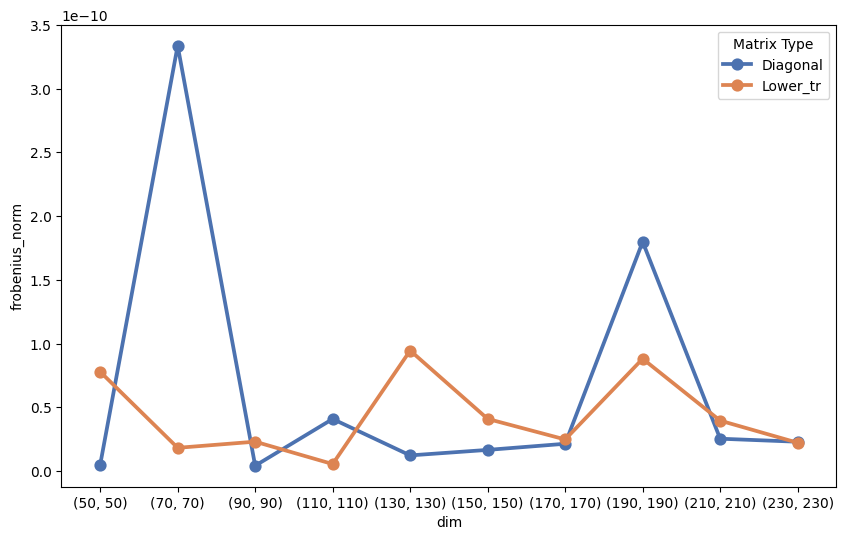

In [7]:
Orthogonal, Diagonal, Lower_tr = jl.eval('gap_A_var_orth_diag_lower()')

# Convert Svd_A, LSQR_A, LSQR_SVD to DataFrames
df2 = pd.DataFrame(Diagonal)
df3 = pd.DataFrame(Lower_tr)

# Add a 'method' column to distinguish the data sources
df2['Matrix Type'] = 'Diagonal'
df3['Matrix Type'] = 'Lower_tr'

# Concatenate the dataframes
df = pd.concat([df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.pointplot(data=df, x='dim', y='frobenius_norm', hue='Matrix Type', palette='deep')

# Annotate each point with its value
# for line in range(0, df.shape[0]):
#     frob_norm = df['frobenius_norm'].iloc[line]
#     if frob_norm < 0.1:
#         ax.text(df['dim'].iloc[line], frob_norm + 0.1, f"{frob_norm:.2e}", 
#                 horizontalalignment='center', size='medium', color='black')
#     else:
#         ax.text(df['dim'].iloc[line], frob_norm + 0.1, round(frob_norm, 2), 
#                 horizontalalignment='center', size='medium', color='black')

#plt.xticks(rotation=45)
#plt.title("Error varying A dimentions, diagonal and lower triangular matrices")
plt.show()


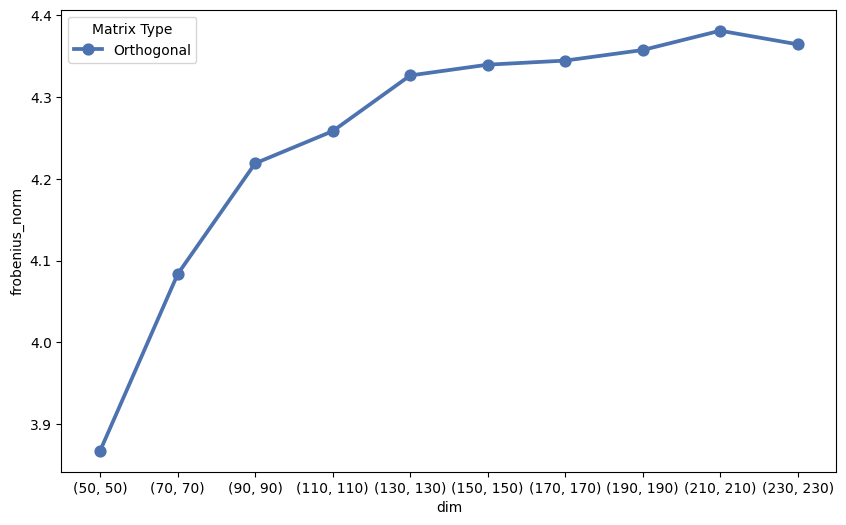

In [8]:
df1 = pd.DataFrame(Orthogonal)
df1['Matrix Type'] = 'Orthogonal'
df1['dim'] = df1['dim'].astype(str)
plt.figure(figsize=(10, 6))
ax = sns.pointplot(data=df1, x='dim', y='frobenius_norm', hue='Matrix Type', palette='deep')

### **----------------------------------------------------------------------------------------------------------------** ###

### **2. Error when varying rank k value** ###

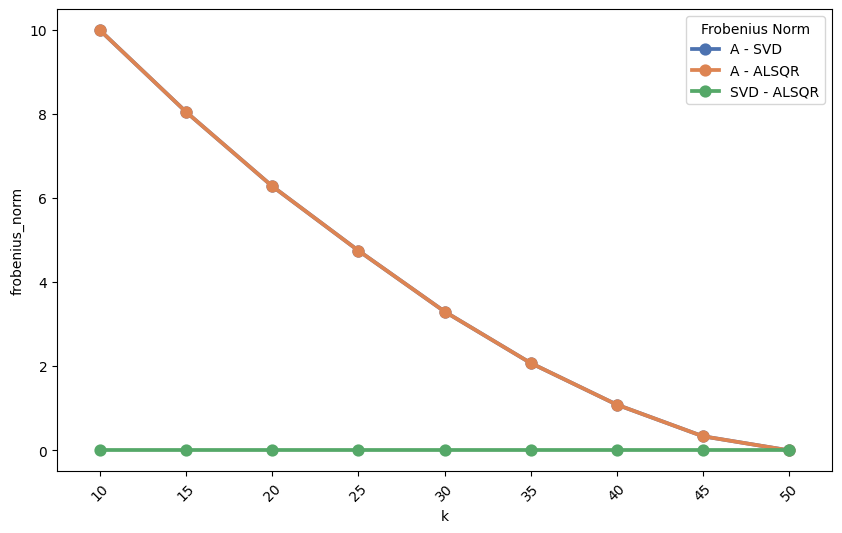

In [11]:
Svd_A, LSQR_A, LSQR_SVD = jl.eval('gap_k_var()')

# Convert Svd_A, LSQR_A, LSQR_SVD to DataFrames
df1 = pd.DataFrame(Svd_A)
df2 = pd.DataFrame(LSQR_A)
df3 = pd.DataFrame(LSQR_SVD)

# Add a 'method' column to distinguish the data sources
df1['Frobenius Norm'] = 'A - SVD'
df2['Frobenius Norm'] = 'A - ALSQR'
df3['Frobenius Norm'] = 'SVD - ALSQR'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
#df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='k', y='frobenius_norm', hue='Frobenius Norm', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Error varying k values")
plt.show()

### **3. Error when varying e** ###

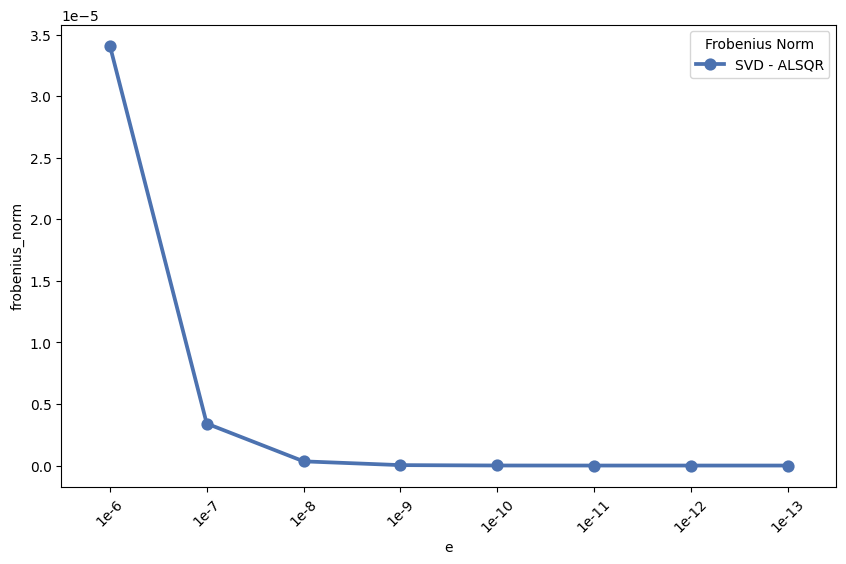

In [12]:
LSQR_SVD = jl.eval('gap_e_var()')

# Convert LSQR_SVD to DataFrames
df = pd.DataFrame(LSQR_SVD)

# Add a 'method' column to distinguish the data sources
df['Frobenius Norm'] = 'SVD - ALSQR'

# Concatenate the dataframes
df = pd.concat([df])

# Convert 'dim' to string so it can be used as a categorical variable
#df['dim'] = df['dim'].astype(str)

df['e'] = df['e'].apply(lambda x: f"1e-{int(-np.log10(x))}")

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='e', y='frobenius_norm', hue='Frobenius Norm', palette='deep')
#plt.xticks(rotation=45)
#plt.title("Error varying e values")
plt.show()